In [1]:
reset -sf

In [2]:
import sys
import os
import numpy as np 
import pandas as pd
from pathlib import Path

# univariate mlp example
from numpy import array

from keras import optimizers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, Dropout, GlobalMaxPooling1D, Input, add
from keras import layers
from keras.models import Model

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.externals import joblib 
import matplotlib.pyplot as plt

/home/administrador/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/administrador/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/administrador/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/administrador/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/administrador/anaconda3/lib/python3.6/importlib/_bo

In [3]:
PATH = Path("../../data/")

In [4]:
scaler = joblib.load(PATH/'train_scaler_x.pkl')

/home/administrador/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
dfX_Train = np.load(PATH/'train_x.npy')
dfX_Val = np.load(PATH/'val_x.npy') 
dfX_Test = np.load(PATH/'test_x.npy')
dfY_Train = np.load(PATH/'train_y.npy')
dfY_Val = np.load(PATH/'val_y.npy')
dfY_Test = np.load(PATH/'test_y.npy')
print(dfX_Train.shape, dfY_Train.shape)
print(dfX_Val.shape, dfY_Val.shape)
print(dfX_Test.shape, dfY_Test.shape)
print(dfX_Train[0,:10])

(8126, 2500) (8126, 1250)
(1016, 2500) (1016, 1250)
(1016, 2500) (1016, 1250)
[1.0743 1.0802 1.1212 1.2092 1.35   1.5396 1.7664 2.0088 2.2473 2.4399]


In [6]:
history=None
freq = 125
ini = 0 #freq
dim = freq * 10
ecg = 1250

In [7]:
print(dfY_Train.max(), dfY_Train.min())
print(dfY_Val.max(), dfY_Val.min())
print(dfY_Test.max(), dfY_Test.min())

199.83 50.0
199.93 50.062
198.82 50.065


In [21]:
"""
#Normalize Y
MAX = 200
MIN = 50
rng = (MAX-MIN)

trainY_n = (dfY_Train - np.array(MIN).reshape(-1,1))/ rng
valY_n = (dfY_Val - np.array(MIN).reshape(-1,1))/ rng
testY_n = (dfY_Test - np.array(MIN).reshape(-1,1))/ rng  
"""                  

'\n#Normalize Y\nMAX = 200\nMIN = 50\nrng = (MAX-MIN)\n\ntrainY_n = (dfY_Train - np.array(MIN).reshape(-1,1))/ rng\nvalY_n = (dfY_Val - np.array(MIN).reshape(-1,1))/ rng\ntestY_n = (dfY_Test - np.array(MIN).reshape(-1,1))/ rng  \n'

In [22]:
#No normalize Y
trainY_n = dfY_Train
valY_n = dfY_Val
testY_n = dfY_Test

In [23]:
print(trainY_n.max(), trainY_n.min())
print(valY_n.max(), valY_n.min())
print(testY_n.max(), testY_n.min())

199.83 50.0
199.93 50.062
198.82 50.065


In [24]:
#Normalize X
rng = (dfX_Train[:,ini:ini+dim].max(axis=1) - dfX_Train[:,ini:ini+dim].min(axis=1))
trainX_0_n = np.array([dfX_Train [:,i] - dfX_Train[:,ini:ini+dim].min(axis=1) 
                       for i in range(ini,ini+dim)]) / rng

rng = (dfX_Train[:,ecg+ini:ini+ecg+dim].max(axis=1) - dfX_Train[:,ecg+ini:ini+ecg+dim].min(axis=1))
trainX_1_n = np.array([dfX_Train [:,i] - dfX_Train[:,ini+ecg:ini+ecg+dim].min(axis=1) for i in range(ini+ecg,ini+ecg+dim)]) / rng

rng = (dfX_Val[:,ini:ini+dim].max(axis=1) - dfX_Val[:,ini:ini+dim].min(axis=1))
valX_0_n = np.array([dfX_Val [:,i] - dfX_Val[:,ini:ini+dim].min(axis=1) 
                       for i in range(ini,ini+dim)]) / rng

rng = (dfX_Val[:,ecg+ini:ini+ecg+dim].max(axis=1) - dfX_Val[:,ecg+ini:ini+ecg+dim].min(axis=1))
valX_1_n = np.array([dfX_Val [:,i] - dfX_Val[:,ini+ecg:ini+ecg+dim].min(axis=1) for i in range(ini+ecg,ini+ecg+dim)]) / rng

rng = (dfX_Test[:,ini:ini+dim].max(axis=1) - dfX_Test[:,ini:ini+dim].min(axis=1))
testX_0_n = np.array([dfX_Test [:,i] - dfX_Test[:,ini:ini+dim].min(axis=1) 
                       for i in range(ini,ini+dim)]) / rng

rng = (dfX_Test[:,ecg+ini:ini+ecg+dim].max(axis=1) - dfX_Test[:,ecg+ini:ini+ecg+dim].min(axis=1))
testX_1_n = np.array([dfX_Test [:,i] - dfX_Test[:,ini+ecg:ini+ecg+dim].min(axis=1) for i in range(ini+ecg,ini+ecg+dim)]) / rng

trainX_0_n = trainX_0_n.T
trainX_1_n = trainX_1_n.T
valX_0_n = valX_0_n.T
valX_1_n = valX_1_n.T
testX_0_n = testX_0_n.T 
testX_1_n = testX_1_n.T

print(trainX_0_n.shape,trainX_1_n.shape)
print(valX_0_n.shape,valX_1_n.shape)
print(testX_0_n.shape,testX_1_n.shape)

(8126, 1250) (8126, 1250)
(1016, 1250) (1016, 1250)
(1016, 1250) (1016, 1250)


In [25]:
trainX_n = np.stack((trainX_0_n, trainX_1_n), axis=2)
valX_n = np.stack((valX_0_n,valX_1_n), axis=2)
testX_n = np.stack((testX_0_n, testX_1_n), axis=2)

print(trainX_n.shape, valX_n.shape, testX_n.shape, trainY_n.shape, valY_n.shape, testY_n.shape)

(8126, 1250, 2) (1016, 1250, 2) (1016, 1250, 2) (8126, 1250) (1016, 1250) (1016, 1250)


In [11]:
#Definition of the model

In [58]:
input_tensor = Input(shape=(dim, 2))

x = Conv1D(filters=128, kernel_size=32, activation='relu')(input_tensor)
x = Conv1D(filters=128, kernel_size=16, activation='relu')(input_tensor)
x = Conv1D(filters=128, kernel_size=8, activation='relu')(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=3)(x)
x = Dropout(0.5)(x)

"""
x = Conv1D(filters=256, kernel_size=9, activation='relu')(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=3)(x)
x = Dropout(0.5)(x)
"""

x = Flatten()(x)

"""
#Residual
y = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(x)
y = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(x)
y = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(x)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
residual = Conv1D(filters=128, kernel_size=1, activation='relu')(x)
x = add([y,residual])
"""
"""
#GlobalMax
#x = GlobalMaxPooling1D()(x)
#x = BatchNormalization()(x)
"""
"""
x = Dense(dim*2, activation='relu', input_dim=dim*2)(x)
x = Dropout(0.7)(x)
x = BatchNormalization()(x)
x = Dense(dim*2, activation='relu', input_dim=dim*2)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(dim, activation='relu', input_dim=dim*2)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
"""
"""
x = Dense(dim, activation='relu', input_dim=dim*2)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
"""

x = Dense(dim, activation='relu', input_dim=dim)(x)
x = Dropout(0.5)(x)
#x = BatchNormalization()(x)

x = Dense(dim)(x)

model = Model(input_tensor,x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 1250, 2)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1243, 32)          544       
_________________________________________________________________
batch_normalization_8 (Batch (None, 1243, 32)          128       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 414, 32)           0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 414, 32)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 13248)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1250)              16561250  
__________

In [59]:
# fit model
model.compile(optimizer=optimizers.Adam(lr=1e-3), loss='mse')
history_prev = history
history = model.fit(trainX_n, trainY_n, validation_data=(valX_n, valY_n), batch_size=64, epochs=10, verbose=1)

Train on 8126 samples, validate on 1016 samples
Epoch 1/10
8126/8126 [==============================] - 6s 800us/step - loss: 1357.6915 - val_loss: 532.8334
Epoch 2/10
8126/8126 [==============================] - 5s 556us/step - loss: 515.8220 - val_loss: 482.1848
Epoch 3/10
8126/8126 [==============================] - 5s 561us/step - loss: 467.6807 - val_loss: 529.1115
Epoch 4/10
8126/8126 [==============================] - 5s 564us/step - loss: 445.1336 - val_loss: 502.8154
Epoch 5/10
8126/8126 [==============================] - 5s 562us/step - loss: 416.2610 - val_loss: 597.5086
Epoch 6/10
8126/8126 [==============================] - 5s 559us/step - loss: 395.5111 - val_loss: 428.7099
Epoch 7/10
8126/8126 [==============================] - 5s 556us/step - loss: 377.0067 - val_loss: 521.7736
Epoch 8/10
8126/8126 [==============================] - 4s 549us/step - loss: 362.8111 - val_loss: 501.7605
Epoch 9/10
8126/8126 [==============================] - 5s 561us/step - loss: 349.8910 

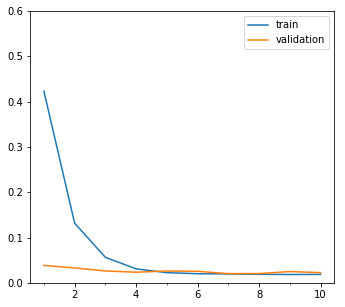

In [18]:
plt.figure(figsize=(12,5))
for i in range(2):
    if i == 0:
        if history_prev is None:
            continue
        else:
            hist = history_prev
    else:
        hist = history
        
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(1, len(loss) +1)
    ax = plt.subplot(1,2,1+i)
    ax.plot(epochs, loss, label="train")
    ax.plot(epochs, val_loss, label="validation")
    ax.set_xticks(epochs, epochs)
    ax.set_ylim(0.0,0.6)
    ax.legend()

plt.show()

In [ ]:
# Save the weights and architecture

In [ ]:
model.save_weights('conv1d.h5')
with open('conv1d.json', 'w') as f:
    f.write(model.to_json())

In [ ]:
model.load_weights('conv1d.h5')

In [ ]:
#Evaluation

In [29]:
y_pred = []
print(testX_n.shape)
for ix in range(testX_n.shape[0]):
    y_pred.append(model.predict([np.expand_dims(testX_n[ix,:].reshape(1250,2),0)]))

(1016, 1250, 2)


In [20]:
"""
Denormalize
testY_n1 = (testY_n * rng) + np.array(MIN).reshape(-1,1)
y_pred_n1 = (y_pred * rng) + np.array(MIN).reshape(-1,1)

print(y_pred_n1.max(), y_pred_n1.min())
print(testY_n1.max(), testY_n1.min())
"""

50.70642936229706 49.789552345871925
198.82 50.065


In [31]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

y_pred = np.array(y_pred).reshape(-1,1250)
print(y_pred.shape, testY_n.shape)
print("Test error analysis:")
print("Explained variance score:", explained_variance_score(testY_n, y_pred))
print("MAE error:", mean_absolute_error(testY_n, y_pred))
print("MSE error:", mean_squared_error(testY_n, y_pred))
print("R2 score:", r2_score(testY_n, y_pred))

(1016, 1250) (1016, 1250)
Test error analysis:
Explained variance score: 0.26329552900845016
MAE error: 16.573783945784104
MSE error: 457.27276060152826
R2 score: 0.262046891028856


In [ ]:
# Visualize

In [32]:
#y_pred = np.array(y_pred).reshape(1016,1250)


127.4734 56.13475 (1016, 1250)


(1, 1250, 2)
99.45874 67.61217 (1250,)
114.25 67.161


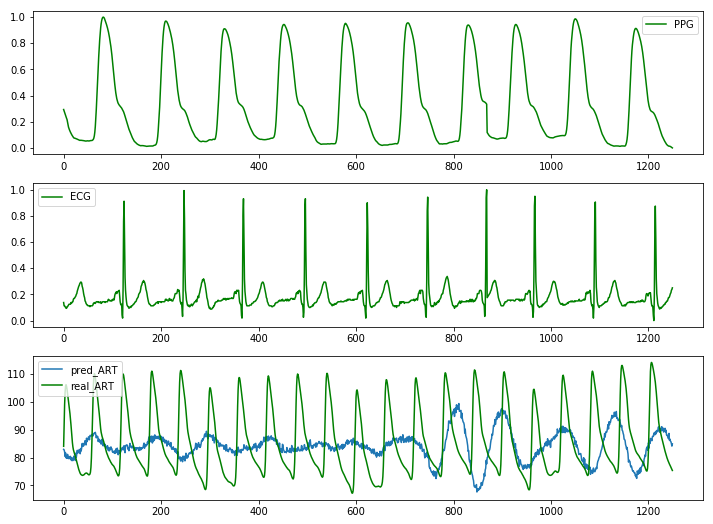

In [36]:
ix=10
print(np.expand_dims(testX_n[ix,:], axis=0).shape)
print(y_pred[ix].max(), y_pred[ix].min(), y_pred[ix].shape)
print(dfY_Train[ix,:].max(), dfY_Train[ix,:].min())

plt.figure(figsize=(12,9))
ax = plt.subplot(3,1,1)
ax.plot(testX_0_n[ix,:].reshape(1,-1).T, c="g", label="PPG")
ax.legend()

ax = plt.subplot(3,1,2)
ax.plot(testX_1_n[ix,:].reshape(1,-1).T, c="g", label="ECG")
plt.legend()


ax = plt.subplot(3,1,3)
ax.plot(y_pred[ix,:], label="pred_ART")
#ax.plot(testY_n1[ix,:].reshape(1,-1).T, c="g", label="real_ART")
ax.plot(dfY_Train[ix,:].T, c="g", label="real_ART")
ax.legend()

plt.show()